Seasonal Crop Planner

Created by: Bisma Siddiqui

This notebook has two external Python files, crop_data.py and crop_planner.py. I changed it to use %%writefile since the files kept disappearing.

I created this project as an extension of a previous project I did last semester. I had created a website in HTML about a fictional nonprofit community garden and I have now made this "Seasonal Crop Planner." This crop planner asks the user to input what season it is. It will then ask if they want to plant fruits or vegetables. Depending on the answer, it will produce a list of crops they can plant, how many pounds they may harvest on average, and will include a bar chart of expected yield production.

Thank you for a great semester Professor, I hope you enjoy this simulation!

Link to my website that inspired this project:

 https://bismasid.github.io/sprouting-together/

🌱 Welcome to the Seasonal Crop Planner! 🌱
Let's figure out what you can plant.

What season is it? (spring/summer/fall/winter): summer
Do you want to plant fruits or vegetables? fruits

In Summer, ideal fruits you can plant include:

  - cherries (typical yield: 5–10 lbs)
  - watermelon (typical yield: 10–30 lbs)
  - cantaloupe (typical yield: 5–15 lbs)
  - peaches (typical yield: 5–20 lbs)
  - plum (typical yield: 4–16 lbs)
  - mango (typical yield: 3–27 lbs)

Let's see how many pounds you might harvest on average: 

Expected average yields (approximate):
  - cherries: 8.0 lbs
  - watermelon: 19.5 lbs
  - cantaloupe: 9.8 lbs
  - peaches: 14.2 lbs
  - plum: 9.8 lbs
  - mango: 16.1 lbs


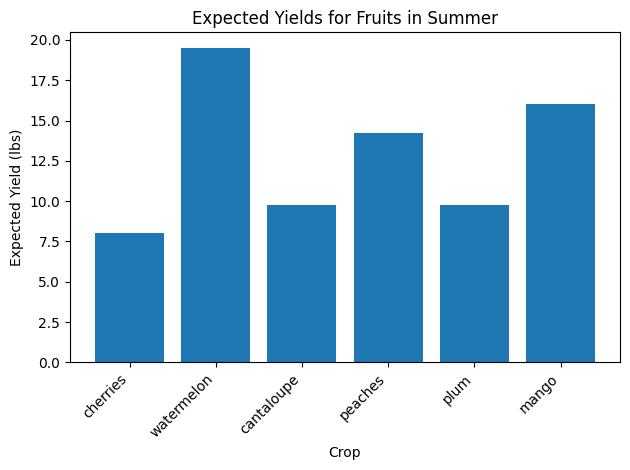

In [3]:
from crop_planner import main

main()

In [4]:
%%writefile crop_data.py
"""
crop_data.py

Stores seasonal crop data.

Includes each season and its respective fruits and vegetables.

Each crop's yield range is given in pounds (lbs).
This is meant for a small plot of land.
"""

CROP_DATA = {
    "spring": {
        "fruit": [
            {"name": "strawberries", "min_yield": 2, "max_yield": 6},
            {"name": "blueberries", "min_yield": 1, "max_yield": 4},
            {"name": "lemon", "min_yield": 1, "max_yield": 10},
            {"name": "raspberries", "min_yield": 1, "max_yield": 5},
        ],
        "vegetable": [
            {"name": "lettuce", "min_yield": 1, "max_yield": 3},
            {"name": "spinach", "min_yield": 1, "max_yield": 3},
            {"name": "peas", "min_yield": 1, "max_yield": 4},
            {"name": "radishes", "min_yield": 1, "max_yield": 3},
        ],
    },

    "summer": {
        "fruit": [
            {"name": "cherries", "min_yield": 5, "max_yield": 10},
            {"name": "watermelon", "min_yield": 10, "max_yield": 30},
            {"name": "cantaloupe", "min_yield": 5, "max_yield": 15},
            {"name": "peaches", "min_yield": 5, "max_yield": 20},
            {"name": "plum", "min_yield": 4, "max_yield": 16},
            {"name": "mango", "min_yield": 3, "max_yield": 27},
        ],
        "vegetable": [
            {"name": "zucchini", "min_yield": 5, "max_yield": 15},
            {"name": "cucumbers", "min_yield": 4, "max_yield": 12},
            {"name": "bell peppers", "min_yield": 3, "max_yield": 8},
            {"name": "green beans", "min_yield": 2, "max_yield": 8},
            {"name": "sweet corn", "min_yield": 4, "max_yield": 10},
        ],
    },

    "fall": {
        "fruit": [
            {"name": "apples", "min_yield": 10, "max_yield": 30},
            {"name": "pears", "min_yield": 8, "max_yield": 25},
            {"name": "cranberries", "min_yield": 2, "max_yield": 6},
            {"name": "pumpkin", "min_yield": 8, "max_yield": 40},
            {"name": "pomegranate", "min_yield": 8, "max_yield": 24},
            {"name": "grapes", "min_yield": 5, "max_yield": 20},
        ],
        "vegetable": [
            {"name": "kale", "min_yield": 2, "max_yield": 6},
            {"name": "carrots", "min_yield": 2, "max_yield": 8},
            {"name": "beets", "min_yield": 2, "max_yield": 6},
            {"name": "broccoli", "min_yield": 1, "max_yield": 4},
            {"name": "green beans", "min_yield": 3, "max_yield": 9},
        ],
    },

    "winter": {
        "fruit": [
            {"name": "oranges", "min_yield": 10, "max_yield": 30},
            {"name": "lemons", "min_yield": 5, "max_yield": 15},
            {"name": "persimmon", "min_yield": 5, "max_yield": 10},
            {"name": "grapefruit", "min_yield": 5, "max_yield": 20},
            {"name": "mandarins", "min_yield": 8, "max_yield": 25},
        ],
        "vegetable": [
            {"name": "cabbage", "min_yield": 2, "max_yield": 6},
            {"name": "brussels sprouts", "min_yield": 2, "max_yield": 5},
            {"name": "leeks", "min_yield": 2, "max_yield": 6},
            {"name": "potatoes", "min_yield": 7, "max_yield": 14},
        ],
    },
}

Overwriting crop_data.py


In [2]:
%%writefile crop_planner.py
"""
crop_planner.py

Seasonal Crop Planner & Yield Predictor

This program asks the user what season is it and if they prefer to
plant fruits or vegetables. It then recommends realistic crops for that
season and category, displays expected yield in pounds (lbs) and shows the
yield in a bar chart for easy understanding.

Created by Bisma Siddiqui
CIS 173 - Final Project
"""

import random
from typing import List, Dict
import matplotlib.pyplot as plt

from crop_data import CROP_DATA


def get_user_preferences() -> Dict[str, str]:
    # Asks user for the current season and desired crop category.

    print("🌱 Welcome to the Seasonal Crop Planner! 🌱")
    print("Let's figure out what you can plant.\n")

    # Ask for season
    valid_seasons = ["spring", "summer", "fall", "winter"]
    while True:
        season = input("What season is it? (spring/summer/fall/winter): ").strip().lower()
        if season in valid_seasons:
            break
        print("Please enter a valid season: spring, summer, fall, or winter.\n")

    # Ask for category
    valid_categories = ["fruit", "vegetable"]
    while True:
        category = input("Do you want to plant fruits or vegetables? ").strip().lower()
        if category in valid_categories:
            break
        elif category in ["fruits", "veggies", "vegetables"]:
            category = "fruit" if category.startswith("fruit") else "vegetable"
            break
        print("Please enter 'fruit' or 'vegetable'.\n")

    return {"season": season, "category": category}


def get_recommended_crops(season: str, category: str) -> List[Dict]:
    #Get the list of recommended crops for the given season and category.

    season_data = CROP_DATA.get(season, {})
    crops = season_data.get(category, [])
    return crops


def simulate_yield(crops: List[Dict], num_simulations: int = 20) -> Dict[str, float]:
    """
    Randomly samples the yield in pounds from min_yield and max_yield
    multiple times and produces the average expected yield for each crop.
    """
    results = {}

    for crop in crops:
        name = crop["name"]
        min_y = crop["min_yield"]
        max_y = crop["max_yield"]

        total_yield = 0
        for _ in range(num_simulations):
            simulated = random.randint(min_y, max_y)
            total_yield += simulated

        average_yield = total_yield / num_simulations
        results[name] = average_yield

    return results


def plot_yield_chart(yield_results: Dict[str, float], season: str, category: str) -> None:

    # Plot a bar chart of expected yields for each crop.

    if not yield_results:
        print("No yield results to plot.")
        return

    crop_names = list(yield_results.keys())
    yields = list(yield_results.values())

    plt.figure()
    plt.bar(crop_names, yields)
    plt.title(f"Expected Yields for {category.title()}s in {season.title()}")
    plt.xlabel("Crop")
    plt.ylabel("Expected Yield (lbs)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


def print_recommendations(crops: List[Dict], season: str, category: str) -> None:

    # Print the list of crop recommendations.

    if not crops:
        print(f"\nSorry, there are no {category}s listed for {season} yet.")
        return

    print(f"\nIn {season.title()}, ideal {category}s you can plant include:\n")
    for crop in crops:
        name = crop["name"]
        min_y = crop["min_yield"]
        max_y = crop["max_yield"]
        print(f"  - {name} (typical yield: {min_y}–{max_y} lbs)")

    print("\nLet's see how many pounds you might harvest on average: ")


def main() -> None:
    """
    Main function to run the Seasonal Crop Planner program.
    """
    preferences = get_user_preferences()
    season = preferences["season"]
    category = preferences["category"]

    crops = get_recommended_crops(season, category)

    print_recommendations(crops, season, category)

    if not crops:
        return

    yield_results = simulate_yield(crops, num_simulations=20)

    print("\nExpected average yields (approximate):")
    for name, avg in yield_results.items():
        print(f"  - {name}: {avg:.1f} lbs")

    plot_yield_chart(yield_results, season, category)


if __name__ == "__main__":
    print("\n-----------------------------\n")
    main()

Writing crop_planner.py
